# Курсовая работа — Методы машинного обучения (Случайный лес)

## **Любченко — Вариант 15**

#### Подготовка исходных данных (Луны)

Импортирование необходимых библиотек и инструментов

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from useful_functions import plot_decision_regions

Конфигурация исходных данных для задачи классификации

In [2]:
X, y = make_moons(n_samples=512, random_state=123, noise=0.18)

Отображение исходных данных

In [ ]:
plt.figure(1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',
                marker='^', alpha=0.5, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',
                marker='o', alpha=0.5, label='1')
plt.legend()
plt.title("Исходные данные (Луны)")
plt.show()

Pазделение данных на обучающую и тестовую выборки

In [3]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.3, random_state=0)

#### Работа с моделью

Подбор наилучших гиперпараметров

In [86]:
params_for_search = {
    'n_estimators': np.arange(1, 700, 5),
    'criterion': ['entropy', 'gini'],
}

forest = RandomForestClassifier()
search = GridSearchCV(forest, params_for_search, n_jobs=-1)
search.fit(X_train, y_train)

cvres = search.cv_results_
best_params = search.best_params_

Вывод средней доли правильных прогнозов при различных комбинациях 

In [ ]:
for maen_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(maen_score,  params)

Вывод лучших параметров

In [87]:
print(f"RF best score = {search.best_score_}")
print(f"RF error = {1 - search.best_score_}")
print(f"best estimators = {search.best_estimator_.n_estimators}")
print(f"best criterion = {search.best_estimator_.criterion}")

RF best score = 0.9636150234741784
RF error = 0.03638497652582162
best estimators = 21
best criterion = entropy


Обучение оптимизированной модели

In [88]:
rf_best = search.best_estimator_

print("Модель bestRF:",
      "\n   n_estimators =", rf_best.n_estimators,
      "\n   criterion =", rf_best.criterion)

rf_best.fit(X_train, y_train)

Модель bestRF: 
   n_estimators = 21 
   criterion = entropy


RandomForestClassifier(criterion='entropy', n_estimators=np.int64(21))

Ошибки обучения на обучающей и тестовой выборках

In [89]:
err_train = np.mean(y_train != rf_best.predict(X_train))
err_test = np.mean(y_test != rf_best.predict(X_test))
print(f"{err_train =: };\n{err_test =: }")

err_train = 0.0;
err_test = 0.032467532467532464


Постороение графика области решений

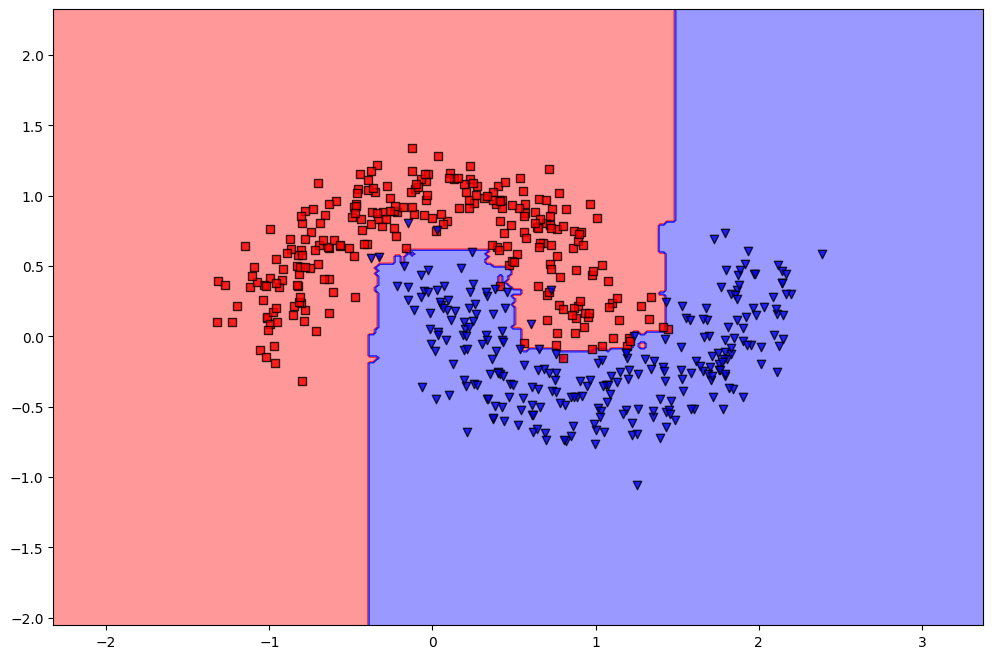

In [90]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(12, 8))
plot_decision_regions(X_combined, y_combined, classifier=rf_best)
plt.show()